In [27]:
# Description: The program uses the recurrent artificial neural network called Long Short Term Memory (LSTM)
            #  to predict the closing price of Microsoft corporation.

In [28]:
# To predict closing price of a stock with input of past 60 days stock price.

In [29]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import date

In [30]:
#Load The Required Stock Data
startDate = pd.to_datetime('2012-01-01')
endDate = pd.to_datetime(date.today())
df = web.DataReader('MSFT', data_source = 'stooq', start = startDate, end = endDate)
df = df.reindex(index = df.index[::-1])
print(df)

                Open      High       Low     Close        Volume
Date                                                            
2012-01-03   21.2343   21.6175   21.1648   21.4576  8.072523e+07
2012-01-04   21.5083   22.0284   21.4745   21.9689  1.004093e+08
2012-01-05   21.9620   22.2399   21.8845   22.1972  6.993688e+07
2012-01-06   22.1049   22.6043   22.0721   22.5328  1.240285e+08
2012-01-09   22.4911   22.5328   22.2301   22.2468  7.445802e+07
...              ...       ...       ...       ...           ...
2023-09-07  331.2900  333.0800  329.0300  329.9100  1.838100e+07
2023-09-08  330.0900  336.1600  329.4600  334.2700  1.954816e+07
2023-09-11  337.2400  338.4200  335.4300  337.9400  1.658332e+07
2023-09-12  335.8150  336.7900  331.4800  331.7700  1.756548e+07
2023-09-13  331.3100  336.8500  331.1700  336.0600  1.654441e+07

[2943 rows x 5 columns]


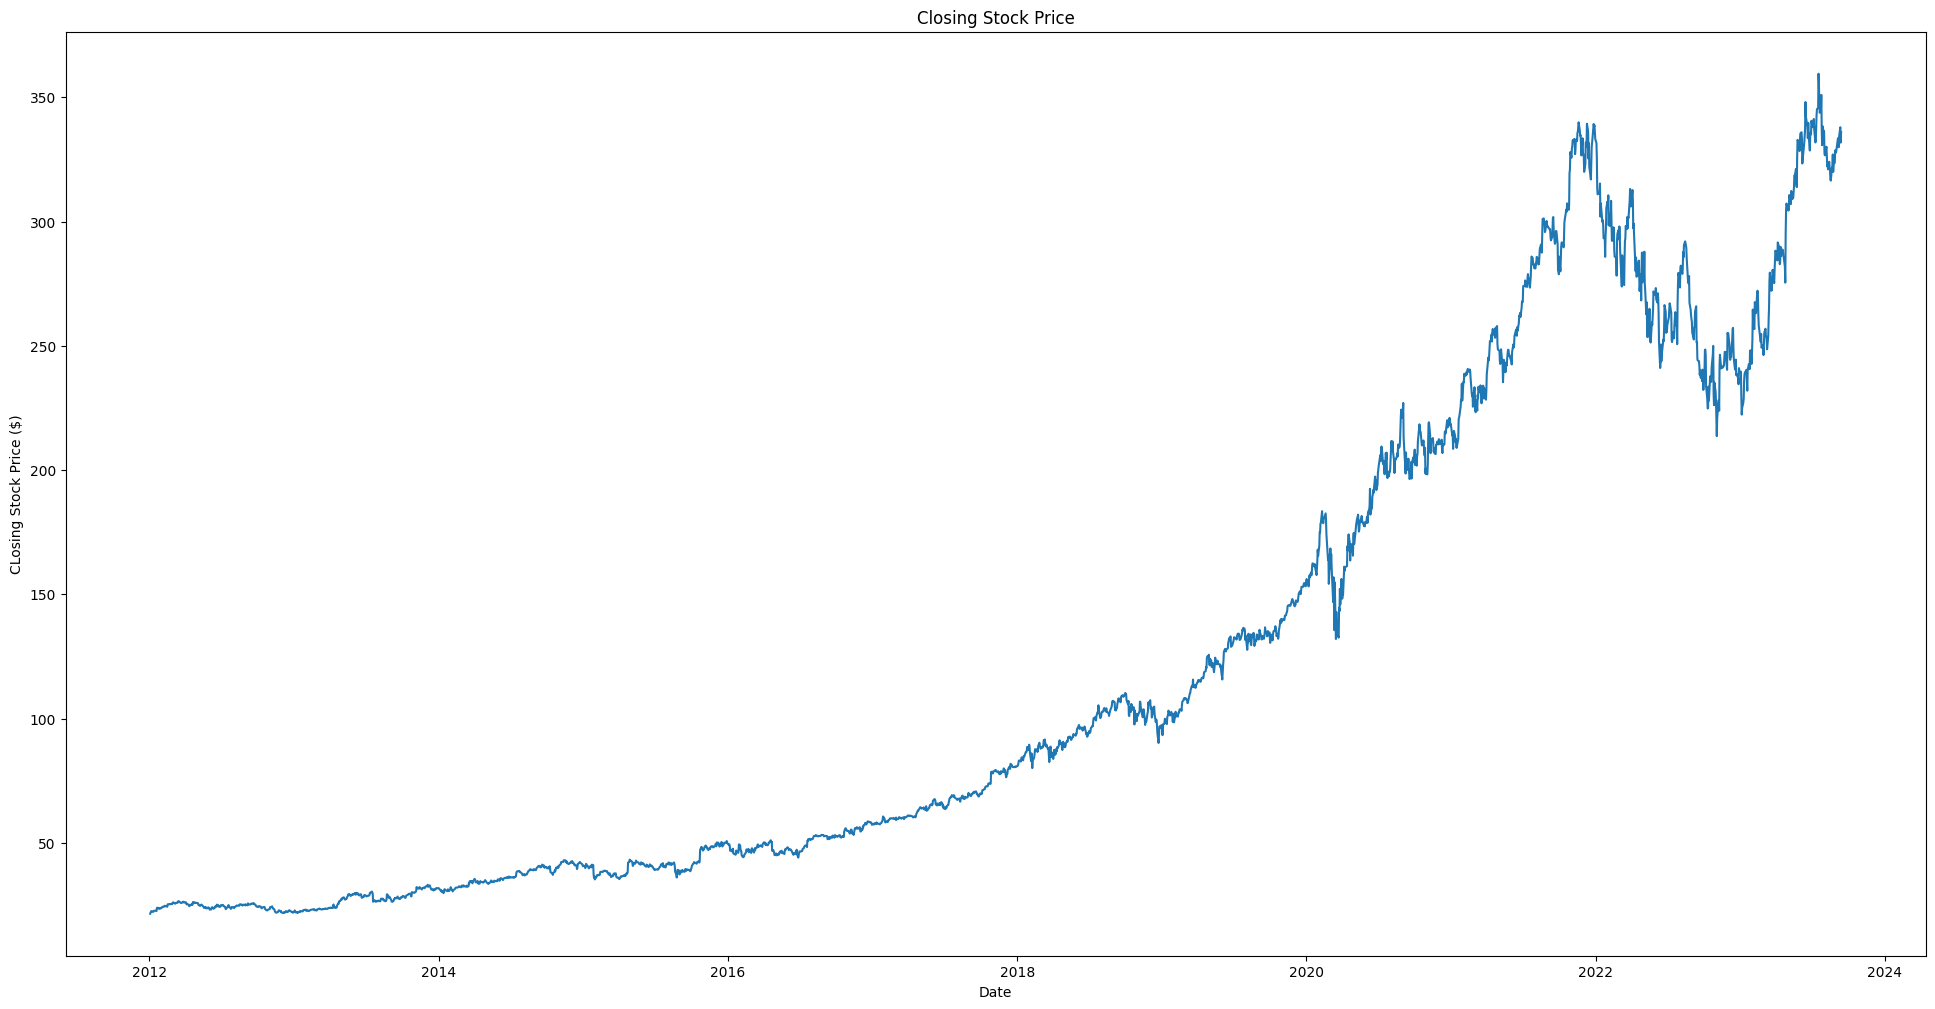

In [31]:
#Visualize the Closing Stock Price History
plt.figure(figsize=(24,12))
plt.title("Closing Stock Price")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("CLosing Stock Price ($)")
plt.show()

In [32]:
#Create A New DataFrame with only Close column
data = df.filter(['Close'])
#Convert DataFrame To Numpy Array
dataset = data.values

# Training -> 80% data
# Testing -> 20% data

training_data_len = math.ceil((len(dataset)) * 0.8)
print(training_data_len)

2355


In [33]:
print(dataset)

[[ 21.4576]
 [ 21.9689]
 [ 22.1972]
 ...
 [337.94  ]
 [331.77  ]
 [336.06  ]]


In [34]:
#Scale The Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.        ]
 [0.00151258]
 [0.00218796]
 ...
 [0.93624871]
 [0.91799603]
 [0.93068712]]


In [35]:
#Create The Scaled Trained DataSet
train_data = scaled_data[0:training_data_len:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [36]:
print(x_train[0])
print(y_train[0])

[0.         0.00151258 0.00218796 0.00318076 0.00233469 0.00256396
 0.00228795 0.00294558 0.00354788 0.00355676 0.00349493 0.00322484
 0.00700465 0.00704282 0.00612634 0.00665203 0.00650796 0.00586482
 0.00675793 0.00658487 0.00743627 0.00756851 0.0082498  0.00815602
 0.00851694 0.00925444 0.00951004 0.00887548 0.00906629 0.00875774
 0.00827021 0.01121313 0.0111368  0.01160096 0.0111868  0.01143322
 0.01169474 0.01138057 0.01262571 0.01229971 0.01363301 0.01312211
 0.01246153 0.01187401 0.01255826 0.01296059 0.01290764 0.01302538
 0.01452908 0.01478438 0.0149607  0.0143643  0.01341025 0.01290764
 0.01272274 0.01293693 0.01296059 0.01433797 0.01417054 0.01338363]
0.013221809507017679


In [37]:
#Convert The x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#Resize The Arrays
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [38]:
unscaled_data = scaler.inverse_transform(dataset)
print(unscaled_data)

[[  7274.82162624]
 [  7447.65759236]
 [  7524.83038928]
 ...
 [114256.126856  ]
 [112170.466948  ]
 [113620.625944  ]]


In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [40]:
# Build The Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1))) # Input Layer
model.add(LSTM(50, return_sequences = False)) # Long Term Memory Layer
model.add(Dense(25)) # Short Term Memory Layer
model.add(Dense(1)) # Forget Gate

In [41]:
# Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 100, epochs = 64)

Epoch 1/64
23/23 [==============================] - 7s 112ms/step - loss: 0.0100
Epoch 2/64
23/23 [==============================] - 3s 111ms/step - loss: 6.0402e-04
Epoch 3/64
23/23 [==============================] - 2s 85ms/step - loss: 1.4997e-04
Epoch 4/64
23/23 [==============================] - 2s 86ms/step - loss: 1.1769e-04
Epoch 5/64
23/23 [==============================] - 2s 86ms/step - loss: 1.1177e-04
Epoch 6/64
23/23 [==============================] - 2s 87ms/step - loss: 1.0782e-04
Epoch 7/64
23/23 [==============================] - 3s 115ms/step - loss: 1.0689e-04
Epoch 8/64
23/23 [==============================] - 3s 109ms/step - loss: 1.0209e-04
Epoch 9/64
23/23 [==============================] - 2s 87ms/step - loss: 1.0804e-04
Epoch 10/64
23/23 [==============================] - 2s 86ms/step - loss: 1.0372e-04
Epoch 11/64
23/23 [==============================] - 2s 86ms/step - loss: 1.0180e-04
Epoch 12/64
23/23 [==============================] - 2s 86ms/step - loss: 

In [42]:
# Create a Testing Dataset
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [43]:
# Convert Data Into Numpy Array
x_test = np.array(x_test)
# Reshape The Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [44]:
# Get The Model Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Error % = ", rmse)
print("Accuracy % = ", (100-rmse))

19/19 [==============================] - 1s 16ms/step
Error % =  7.712522011781407
Accuracy % =  92.2874779882186


<ipython-input-45-c8af41b10fce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


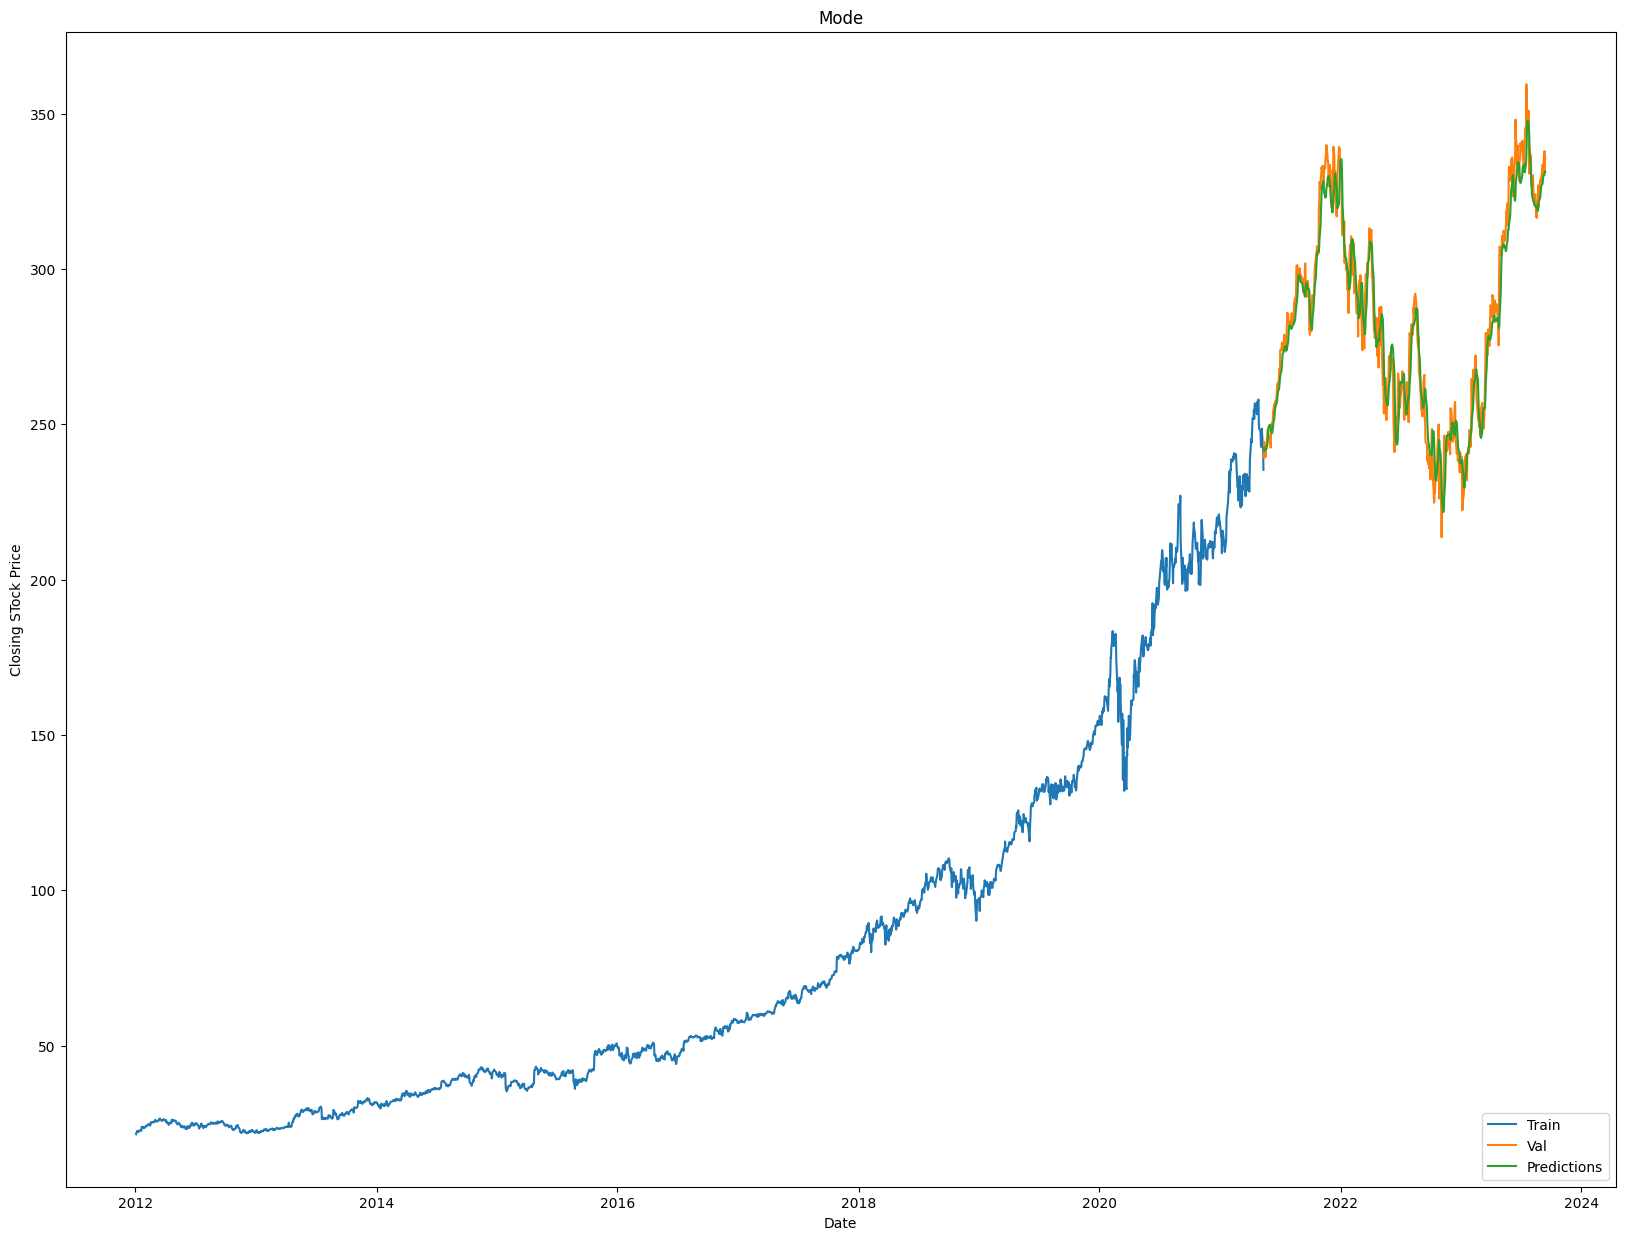

In [45]:
# Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,15))
plt.title("Mode")
plt.xlabel("Date")
plt.ylabel("Closing STock Price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [46]:
# Use Model to Predict Future Price
Google_quote = web.DataReader('GOOGL', data_source = 'stooq', start = startDate, end = endDate)
new_df = Google_quote.filter(['Close'])
last_60_days = new_df[:60].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 58ms/step
[[122.53663]]
